In [2]:
import pandas as pd
import numpy as np

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)
df.to_csv('module_5_auto.csv')

In [4]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Функции для построения графиков</h2>

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Цена (в долларах)')
    plt.ylabel('Доля автомобилей')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    # обучение данных 
    # тестировка данных 
    # lr:  объект линейной регрессии 
    # poly_transform:  объект полиномиального преобразования 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='обучение данных')
    plt.plot(xtest, y_test, 'go', label='тестировка данных')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Прогнозируемая функция')
    plt.ylim([-10000, 60000])
    plt.ylabel('Цена')
    plt.legend()

<h2 id="ref1">Часть 1: Обучение и тестирование</h2>

<p>Важным шагом в тестировании модели является разделение данных на данные для обучения и тестирования. Мы поместим целевые данные <b>price</b> в отдельный фрейм данных <b>y_data</b>:</p>

In [8]:
y_data = df['price']

Удалить данные о цене в фрейме данных <b>x_data</b>:

In [9]:
x_data=df.drop('price',axis=1)

Теперь мы случайным образом разделяем наши данные на данные обучения и тестирования, используя функцию <b>train_test_split</b>.

In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("количество тестовых образцов:", x_test.shape[0])
print("количество обучающих образцов:",x_train.shape[0])



количество тестовых образцов: 21
количество обучающих образцов: 180


Параметр <b>test_size</b> задает долю данных, разделенных на тестовый набор. В приведенном выше примере тестовый набор составляет 10% от общего набора данных.

<h4>Используйте функцию «train_test_split», чтобы разделить набор данных таким образом, чтобы 40% выборок данных использовались для тестирования. Установите параметр «random_state» равным нулю. Вывод функции должен быть следующим: «x_train1», «x_test1», «y_train1» и «y_test1».</h4>

In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("количество тестовых образцов:", x_test1.shape[0])
print("количество обучающих образцов:",x_train1.shape[0])

количество тестовых образцов: 81
количество обучающих образцов: 120


Давайте импортируем <b>LinearRegression</b> из модуля <b>linear_model</b>.

In [12]:
from sklearn.linear_model import LinearRegression

Мы создаем объект линейной регрессии:

In [13]:
lre=LinearRegression()

Подгоняем модель по признаку «лошадиные силы»:

In [14]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Давайте посчитаем R^2 на тестовых данных:

In [15]:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

Мы можем видеть, что R^2 намного меньше, используя тестовые данные по сравнению с данными обучения.

In [16]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

<h4>Найдите R^2 на тестовых данных, используя 40% набора данных для тестирования.</h4>

In [17]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

Иногда у вас недостаточно данных для тестирования; в результате вы можете захотеть выполнить перекрестную проверку. Давайте рассмотрим несколько методов, которые вы можете использовать для перекрестной проверки.

<h2>Оценка перекрестной проверки</h2>

Давайте импортируем <b>model_selection</b> из модуля <b>cross_val_score</b>.

In [18]:
from sklearn.model_selection import cross_val_score

Мы вводим объект, функцию («horsepower») и целевые данные (y_data). Параметр 'cv' определяет количество сгибов. В данном случае это 4.

In [19]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

Оценка по умолчанию R^2. Каждый элемент массива имеет среднее значение R^2 для сгиба:

In [20]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Мы можем рассчитать среднее значение и стандартное отклонение нашей оценки:

In [21]:
print("Среднее значение складок", Rcross.mean(), "и стандартное отклонение" , Rcross.std())

Среднее значение складок 0.522009915042119 и стандартное отклонение 0.2911839444756029


Мы можем использовать отрицательный квадрат ошибки в качестве оценки, установив для метрики параметра «оценка» значение «neg_mean_squared_error».

In [22]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

<h4>Рассчитайте среднее значение R^2, используя два раза, затем найдите среднее значение R^2 для второго раза, используя функцию «лошадиных сил»:</h4>

In [23]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

Вы также можете использовать функцию cross_val_predict для прогнозирования вывода. Функция разбивает данные на указанное количество сгибов, один сгиб для тестирования, а другие сгибы используются для обучения. Сначала импортируйте функцию:

In [24]:
from sklearn.model_selection import cross_val_predict

Мы вводим объект, характеристику <b>"лошадиные силы"</b> и целевые данные <b>y_data</b>. Параметр 'cv' определяет количество сгибов. В данном случае это 4. Мы можем вывести результат:

In [25]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h2 id="ref2">Часть 2. Переоснащение, недооснащение и выбор модели</h2>

<p>Оказалось, что тестовые данные, иногда называемые "выборочными данными", являются гораздо лучшим показателем того, насколько хорошо ваша модель работает в реальном мире. Одной из причин этого является переоснащение.

Давайте рассмотрим несколько примеров. Оказывается, эти различия более очевидны в множественной линейной регрессии и полиномиальной регрессии, поэтому мы рассмотрим переоснащение в этом контексте.</p>

Давайте создадим объекты множественной линейной регрессии и обучим модель, используя <b>'лошадиные силы'</b>, <b>'собственный вес'</b>, <b>'размер двигателя'</b> и <b >'highway-mpg'</b> в качестве функций.

In [26]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Прогноз с использованием обучающих данных:

In [27]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Прогноз с использованием тестовых данных:

In [28]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Давайте выполним некоторую оценку модели, используя наши данные обучения и тестирования отдельно. Во-первых, мы импортируем библиотеки seaborn и matplotlib для построения графиков.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Давайте рассмотрим распределение прогнозируемых значений обучающих данных.

/Users/volodymyrchubay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/volodymyrchubay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


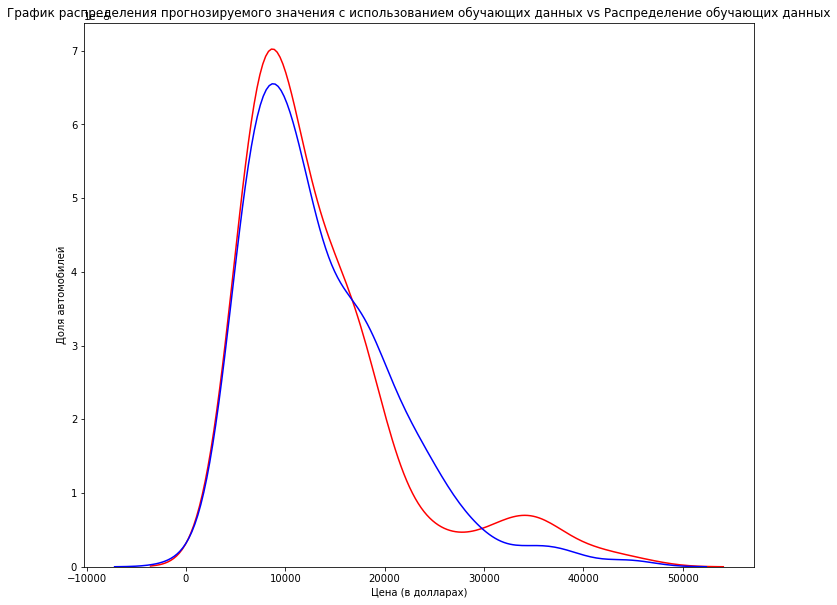

In [31]:
Title = 'График распределения прогнозируемого значения с использованием обучающих данных vs Распределение обучающих данных'
DistributionPlot(y_train, yhat_train, "Фактические значения (Train)", "Прогнозируемые значения (Train)", Title)

Рисунок 1: График прогнозируемых значений с использованием обучающих данных по сравнению с фактическими значениями обучающих данных.

Пока что модель, похоже, хорошо учится на обучающем наборе данных. Но что происходит, когда модель сталкивается с новыми данными из тестового набора данных? Когда модель генерирует новые значения из тестовых данных, мы видим, что распределение прогнозируемых значений сильно отличается от фактических целевых значений.

/Users/volodymyrchubay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/volodymyrchubay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


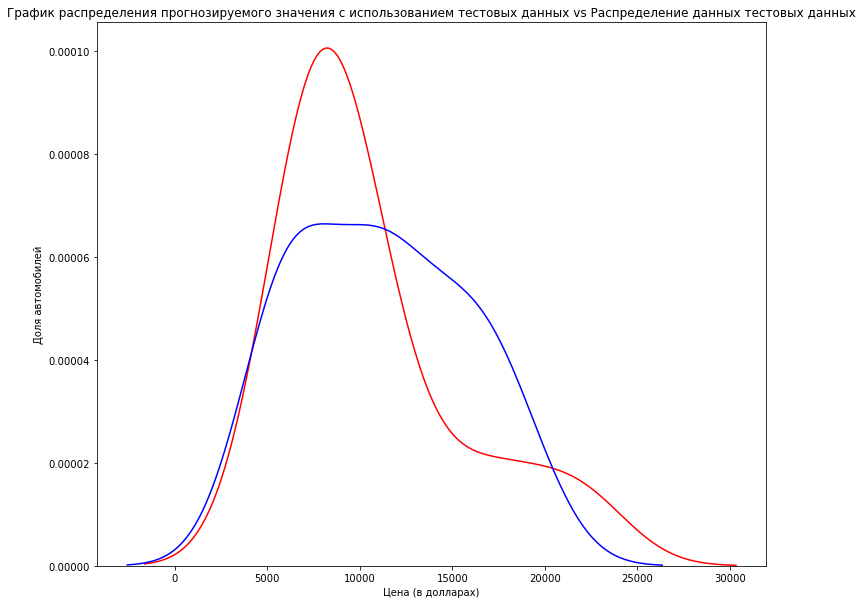

In [32]:
Title='График распределения прогнозируемого значения с использованием тестовых данных vs Распределение данных тестовых данных'
DistributionPlot(y_test,yhat_test,"Фактические значения (Test)","Прогнозируемые значения (Test)",Title)

Рисунок 2: График прогнозируемого значения с использованием тестовых данных по сравнению с фактическими значениями тестовых данных.

Сравнивая рисунок 1 и рисунок 2, становится очевидным, что распределение тестовых данных на рисунке 1 намного лучше соответствует данным. Эта разница на рисунке 2 очевидна в диапазоне от 5000 до 15000. Здесь форма распределения сильно отличается. Давайте посмотрим, демонстрирует ли полиномиальная регрессия падение точности прогноза при анализе тестового набора данных.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Переоснащение</h4>
<p>Переоснащение происходит, когда модель соответствует шуму, но не основному процессу. Таким образом, при тестировании вашей модели с помощью тестового набора ваша модель не работает так же хорошо, поскольку это шум моделирования, а не базовый процесс, создавший взаимосвязь. Давайте создадим полиномиальную модель степени 5.</p>

Давайте используем 55 процентов данных для обучения, а остальные — для тестирования:

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Мы выполним полиномиальное преобразование степени 5 для характеристики <b>'лошадиная сила'</b>.

In [35]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Теперь давайте создадим полигональную модель линейной регрессии и обучим ее.

In [36]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Мы можем увидеть результат нашей модели, используя метод «предсказать». Мы присваиваем значения «yhat».

In [37]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.70635688,  7308.02977067, 12213.7853793 , 18893.18863048,
       19995.88664009])

Давайте возьмем первые пять прогнозируемых значений и сравним их с фактическими целями.

In [38]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.70635688  7308.02977067 12213.7853793  18893.18863048]
True values: [ 6295. 10698. 13860. 13499.]


Мы будем использовать функцию «PollyPlot», которую мы определили в начале лабораторной работы, для отображения данных обучения, данных тестирования и прогнозируемой функции.

InvalidIndexError: (slice(None, None, None), None)

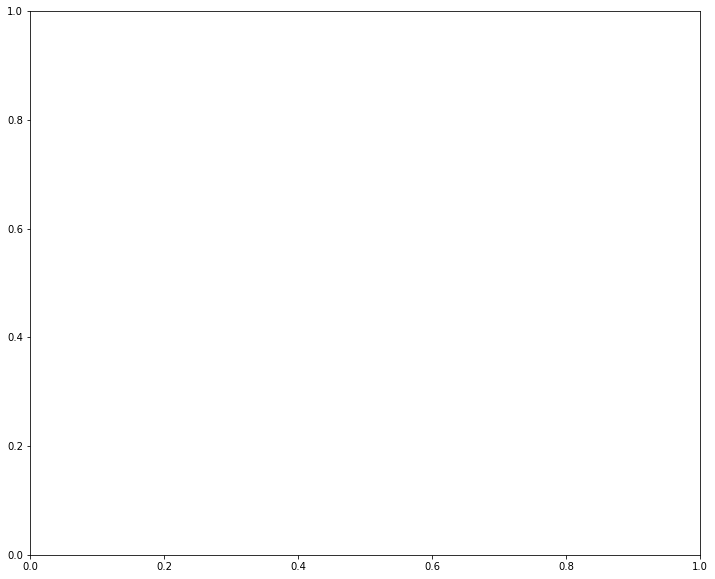

In [40]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Рисунок 3: Модель полиномиальной регрессии, где красные точки представляют обучающие данные, зеленые точки представляют тестовые данные, а синяя линия представляет прогноз модели.

Мы видим, что оценочная функция, кажется, отслеживает данные, но около 200 лошадиных сил функция начинает расходиться с точками данных.

R^2 тренировочных данных:

In [41]:
poly.score(x_train_pr, y_train)

0.5567716902638294

R^2 тестовых данных:

In [42]:
poly.score(x_test_pr, y_test)

-29.871426910506546

Мы видим, что R ^ 2 для обучающих данных составляет 0,5567, а R ^ 2 для тестовых данных составляет -29,87. Чем ниже R^2, тем хуже модель. Отрицательное значение R^2 является признаком переобучения.

Давайте посмотрим, как R ^ 2 изменяется на тестовых данных для полиномов разного порядка, а затем построим результаты:

Text(3, 0.75, 'Maximum R^2 ')

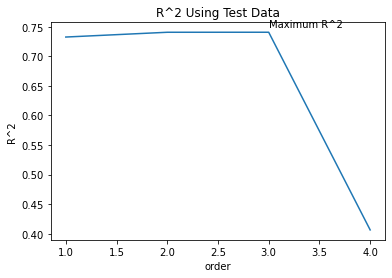

In [43]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

Мы видим, что R^2 постепенно увеличивается, пока не используется полином третьего порядка. Затем R ^ 2 резко уменьшается до полинома четвертого порядка.

Следующая функция будет использоваться в следующем разделе. Пожалуйста, запустите ячейку ниже.

In [44]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

Следующий интерфейс позволяет вам экспериментировать с различными порядками полиномов и различными объемами данных.

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

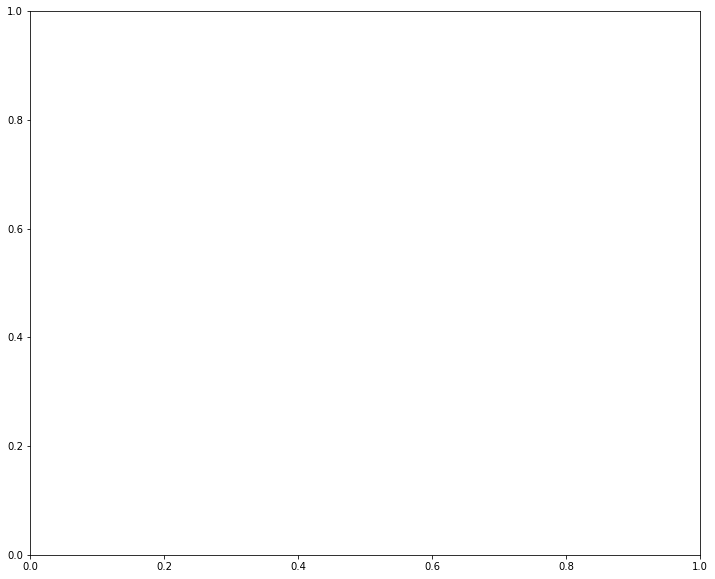

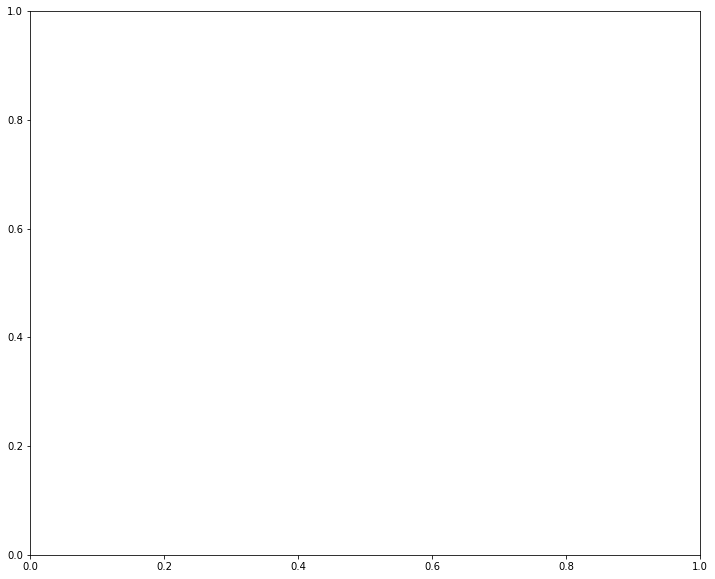

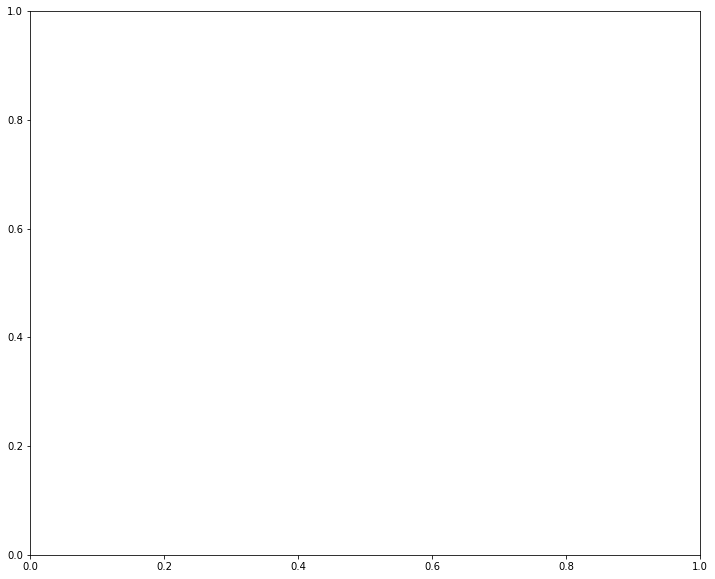

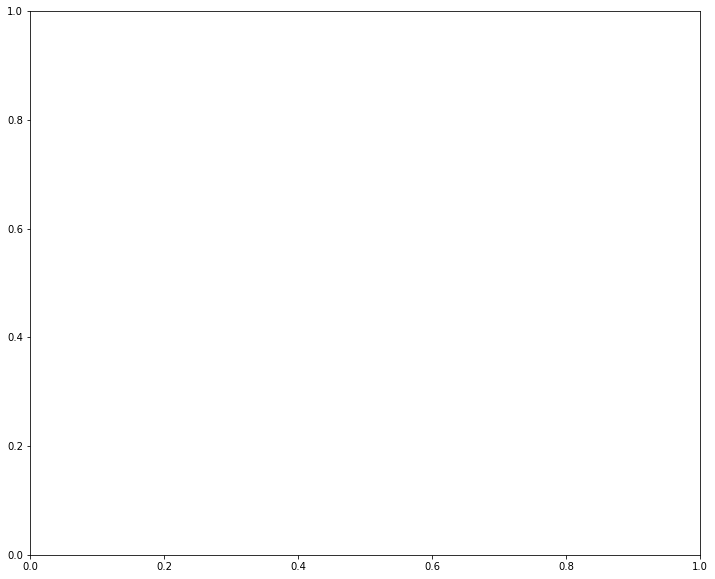

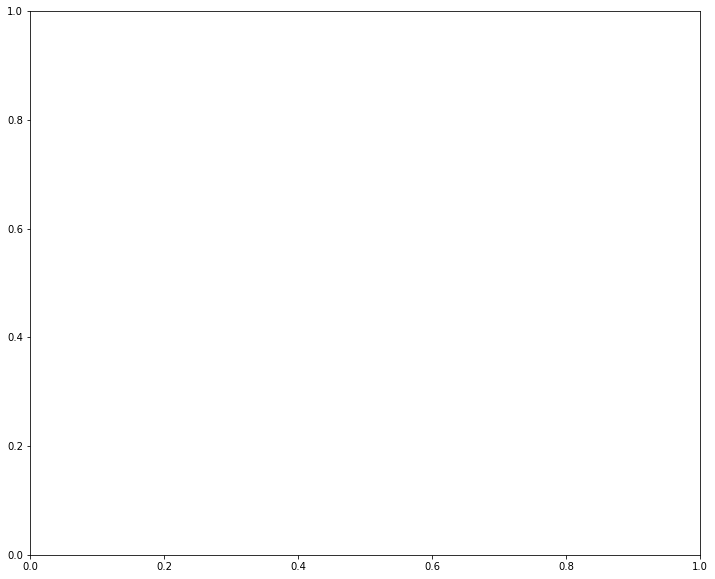

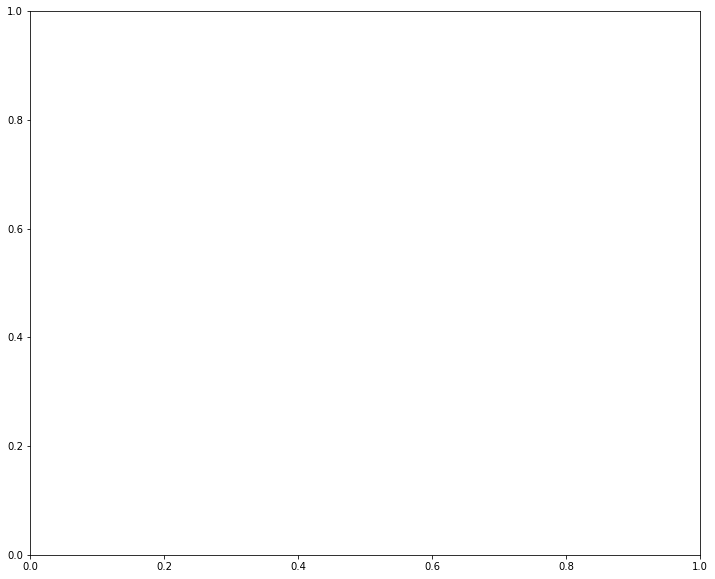

In [45]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

<h4>Мы можем выполнять полиномиальные преобразования с более чем одним признаком. Создайте объект «PolynomialFeatures» «pr1» второй степени.</h4>

In [46]:
pr1=PolynomialFeatures(degree=2)

<h4>Преобразуйте обучающие и тестовые образцы для характеристик «лошадиная сила», «снаряженная масса», «объем двигателя» и «расход на галлон». Подсказка: используйте метод «fit_transform».</h4>

In [47]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

<h4>Сколько измерений имеет новая функция? Подсказка: используйте атрибут «форма».</h4>

In [48]:
x_train_pr1.shape #there are now 15 features

(110, 15)

<h4>Создайте модель линейной регрессии «poly1». Обучите объект методом «подгонки», используя полиномиальные признаки.</h4>

In [50]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

<h4>Используйте метод «прогнозировать», чтобы предсказать выходные данные полиномиальных функций, затем используйте функцию «DistributionPlot», чтобы отобразить распределение прогнозируемых выходных данных теста по сравнению с фактическими тестовыми данными.</h4>

/Users/volodymyrchubay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/volodymyrchubay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


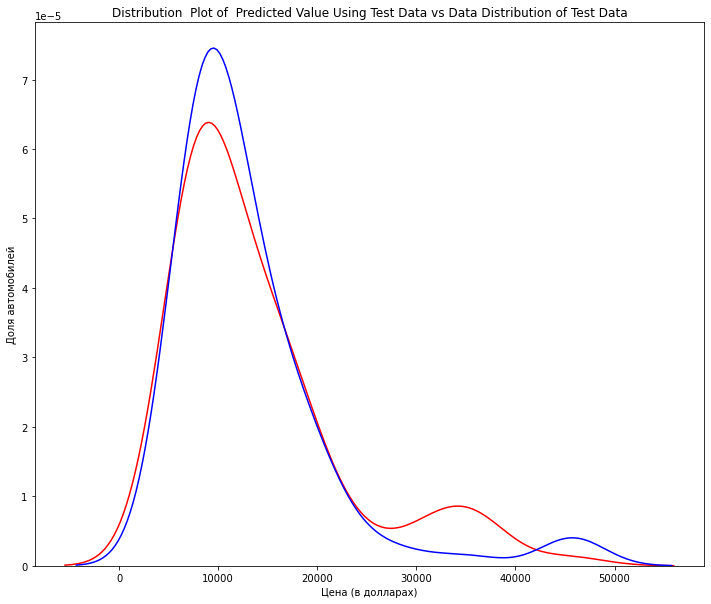

In [52]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

<h4>Используя приведенный выше график распределения, опишите (словами) два региона, где прогнозируемые цены менее точны, чем фактические цены.</h4>

Прогнозируемое значение выше, чем фактическое значение для автомобилей, цена которых находится в диапазоне 10 000 долларов США, и, наоборот, прогнозируемая цена ниже, чем стоимость в диапазоне от 30 000 до 40 000 долларов США. Таким образом, модель не так точна в этих диапазонах.

<h2 id="ref3">Часть 3. Регрессия хребта</h2>

В этом разделе мы рассмотрим регрессию хребта и посмотрим, как параметр альфа изменяет модель. Просто примечание, здесь наши тестовые данные будут использоваться в качестве данных проверки.

Давайте выполним полиномиальное преобразование второй степени для наших данных.

In [53]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Импортируем <b>Ridge</b> из модуля <b>линейные модели</b>.

In [54]:
from sklearn.linear_model import Ridge

Давайте создадим объект регрессии Ridge, установив для параметра регуляризации (альфа) значение 0,1.

In [55]:
RigeModel=Ridge(alpha=1)

Как и в случае обычной регрессии, вы можете подогнать модель, используя метод подгонки.

In [56]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

Точно так же можно получить прогноз:

In [57]:
yhat = RigeModel.predict(x_test_pr)

Давайте сравним первые пять предсказанных выборок с нашим тестовым набором:

In [58]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


Мы выбираем значение альфа, которое минимизирует ошибку теста. Для этого мы можем использовать цикл for. Мы также создали индикатор выполнения, чтобы видеть, сколько итераций мы уже выполнили.

In [59]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█| 1000/1000 [00:03<00:00, 250.41it/s, Test Score=0.564, Train Score=0.859]


Мы можем построить значение R ^ 2 для разных альф:

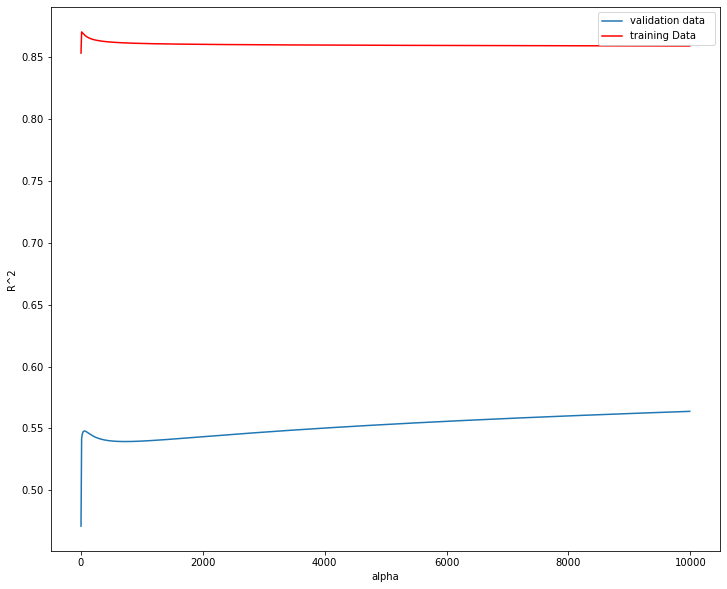

In [60]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Рисунок 4: Синяя линия представляет R^2 проверочных данных, а красная линия представляет R^2 обучающих данных. Ось x представляет различные значения альфа.

Здесь модель строится и тестируется на одних и тех же данных, поэтому обучающие и тестовые данные совпадают.

Красная линия на рисунке 4 представляет собой R^2 обучающих данных. По мере увеличения альфа R^2 уменьшается. Следовательно, по мере увеличения альфа модель хуже работает на обучающих данных.

Синяя линия представляет R^2 в данных проверки. По мере увеличения значения альфа R^2 увеличивается и сходится в точке.

<h4>Выполните регрессию Риджа. Вычислите R ^ 2, используя полиномиальные функции, используйте обучающие данные для обучения модели и используйте тестовые данные для проверки модели. Параметр альфа должен быть установлен на 10.</h4>

In [61]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440207269

<h2 id="ref4">Часть 4. Поиск по сетке</h2>

Термин альфа является гиперпараметром. У Sklearn есть класс <b>GridSearchCV</b>, упрощающий процесс поиска лучшего гиперпараметра.

Давайте импортируем <b>GridSearchCV</b> из модуля <b>model_selection</b>.

In [62]:
from sklearn.model_selection import GridSearchCV

Создаем словарь значений параметров:

In [63]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Создайте объект регрессии Ridge:

In [64]:
RR=Ridge()
RR

Ridge()

Создайте объект поиска сетки хребта:

In [65]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model:

In [66]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

Объект находит лучшие значения параметров в данных проверки. Мы можем получить оценку с лучшими параметрами и присвоить ее переменной BestRR следующим образом:

In [67]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

Теперь мы тестируем нашу модель на тестовых данных:

In [68]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152